In [8]:
%matplotlib widget

import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt

In [2]:
with open('treasures.pkl', 'rb') as f:
  data = pickle.load(f)

In [3]:
df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['description','call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]

In [7]:
dtale.show(df)

In [4]:
year = 2023
month = 9
day = 21

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

['912796CR8']

In [5]:
cusip = cusipList[0]

thisTreasury = df[df['cusip'] == cusip].sort_values('date')
thisTreasury

,date,cusip,coupon,maturity,end-of-day-price
53829,2023-03-23,912796CR8,0.0,2023-09-21,97.692250
53389,2023-03-24,912796CR8,0.0,2023-09-21,97.745333
52949,2023-03-27,912796CR8,0.0,2023-09-21,97.708833
52509,2023-03-28,912796CR8,0.0,2023-09-21,97.716889
52069,2023-03-29,912796CR8,0.0,2023-09-21,97.720139
...,...,...,...,...,...
1775,2023-09-11,912796CR8,0.0,2023-09-21,99.868500
1331,2023-09-12,912796CR8,0.0,2023-09-21,99.883111
888,2023-09-13,912796CR8,0.0,2023-09-21,99.897528
444,2023-09-14,912796CR8,0.0,2023-09-21,99.912500


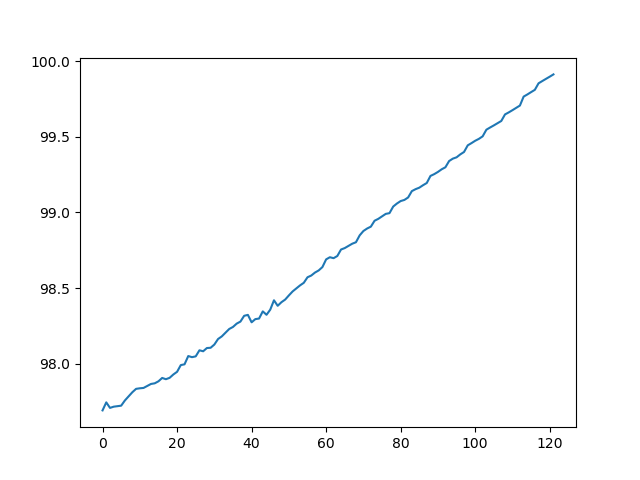

In [6]:
plt.plot(thisTreasury['end-of-day-price'].to_numpy()[0:-1])
plt.show()